In [1]:
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms
import torch
import random

/home/hinton/anaconda3/envs/hyj_pt4al/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform_train = transforms.Compose([
    transforms.Resize([144,144]),
    transforms.RandomCrop([128,128]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [4]:
path = '/home/lecun/NAS_AIlab_dataset/dataset/cifar10/train/cat/house_cat_s_002092.png'
img = cv2.imread(path)
img = Image.fromarray(img)
img = transform_train(img)
c,w,h = img.shape
img1 = img[:,:w//2,:]
img2 = img[:,w//2:,:]
img3 = torch.cat((img2,img1),dim=1)
print(img1.shape)
print(img2.shape)
print(img3.shape)

torch.Size([3, 64, 128])
torch.Size([3, 64, 128])
torch.Size([3, 128, 128])


In [2]:
def softmax(list):
    array = np.array(list)
    exp_a = np.exp(array)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [3]:
def normalize(list):
    MAX = max(list)
    MIN = min(list)
    norm_list = [(x-MIN)/(MAX-MIN) for x in list]
    return norm_list

In [71]:
c_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/classification_loss/test_classification_loss.txt', 'r')
# o_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/orderprediction/orderprediction_loss.txt', 'r')
r_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/rotation/test_rotation_loss.txt', 'r')

c_loss = []
c_pred = []
for string in c_file.readlines():
    c_loss += [float(string.split('//')[0])]
    c_pred += [float(string.split('//')[2])]

r_loss = []
r_pred = []
for string in r_file.readlines():
    r_loss += [float(string.split('//')[0])]
    r_pred += [float(string.split('//')[2])]

c_norm = c_loss
r_norm = r_loss

# c_norm = [float(np.log(1+i)) for i in c_loss]
# o_norm = [float(np.log(1+i))/sum(o_loss) for i in o_loss]
# r_norm = [float(np.log(1+i)) for i in r_loss]

c_norm = np.argsort(c_loss)
# o_norm = np.argsort(o_loss)
r_norm = np.argsort(r_loss)

# c_norm = c_norm / max(c_norm)
# # o_norm = o_norm / max(o_norm)
# r_norm = r_norm / max(r_norm)

c_norm = normalize(c_norm)
# o_norm = normalize(o_loss)
r_norm = normalize(r_norm)

# print(len(c_norm))
# print(len(o_norm))
# print(len(r_norm))

In [83]:
idx = [c and r for c,r in zip(c_pred,r_pred)]
print(sum(idx))
c_corr = [c_norm[i] for i in range(len(idx)) if idx[i]==1.0]
r_corr = [r_norm[i] for i in range(len(idx)) if idx[i]==1.0]
print(c_corr[:5])

7420.0
[0.49264926492649264, 0.8747874787478748, 0.4967496749674967, 0.9867986798679867, 0.49874987498749873]


7420


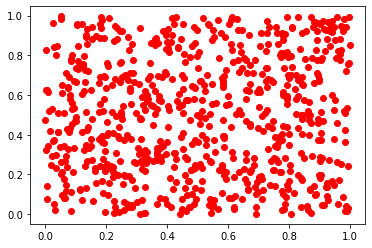

SpearmanrResult(correlation=0.044212274302122746, pvalue=9.741307492581302e-06)


In [86]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# plt.plot(c_norm[:15], r_norm[:15], 'ro')
print(len(c_corr))
c_sample = [c_corr[i] for i in range(0,len(c_corr),10)]
r_sample = [r_corr[i] for i in range(0,len(r_corr),10)]
plt.plot(c_sample, r_sample, 'ro')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.show()

# score = spearmanr(c_norm[:1000], r_norm[:1000])
score = spearmanr(c_norm, r_norm)
print(score)

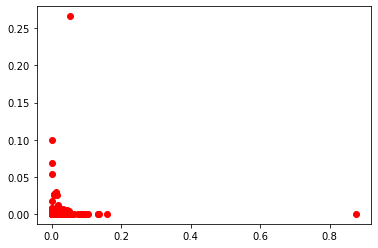

In [17]:
plt.plot(r_norm[:1000], o_norm[:1000], 'ro')
plt.show()

[0.002284181071445346, 6.341733387671411e-05, 5.6622808187967166e-05, 6.7193403244018555, 2.8271126747131348]
[0.9977184534072876, 0.999936580657959, 0.9999433755874634, 0.5993468165397644, 0.9408165216445923]
[10.452502250671387, 15.925614356994629, 11.566078186035156, 11.13090991973877, 15.667659759521484]
[1.0, 1.0, 1.0, 0.0, 0.0]
10000


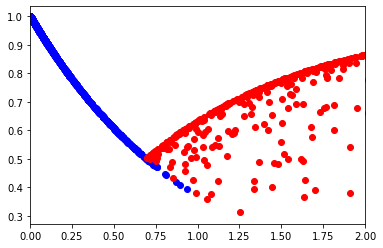

SpearmanrResult(correlation=-0.6858130273445555, pvalue=0.0)


In [125]:
file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/classification_loss/classification_loss_confidence_distance.txt', 'r')
loss = []
conf = []
dist = []
correct = []
for string in file.readlines():
    loss += [float(string.split('//')[0])]
    conf += [float(string.split('//')[1])]
    dist += [float(string.split('//')[2])]
    correct += [float(string.split('//')[3])]
print(loss[:5])
print(conf[:5])
print(dist[:5])
print(correct[:5])

# print(max(dist))
# print(min(dist))
print(len(loss))

norm_loss = normalize(loss)
norm_conf = normalize(conf)
norm_dist = normalize(dist)

correct_loss = []
correct_conf = []
correct_dist = []
incorr_loss = []
incorr_conf = []
incorr_dist = []
for i in range(len(loss)):
    if(correct[i]==1.0):
        correct_loss.append(loss[i])
        correct_conf.append(conf[i])
        correct_dist.append(dist[i])
    else:
        incorr_loss.append(loss[i])
        incorr_conf.append(conf[i])
        incorr_dist.append(dist[i])

import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# plt.plot(loss_rank[:1000], conf_rank[:1000], 'ro')
# plt.plot(loss[:100], conf[:100], 'ro')
# plt.plot(norm_loss, norm_conf, 'ro')
# plt.plot(loss, conf, 'ro')
reverse_incorr_conf = [1-incorr_conf[i] for i in range(len(incorr_conf))]
plt.plot(correct_loss, correct_conf, 'bo', incorr_loss, incorr_conf, 'ro')
plt.xlim(0,2)
# plt.ylim(0,1)
plt.show()

score = spearmanr(loss, conf)
print(score)

In [114]:
print(len(correct_loss))
print(len(incorr_loss))
print(len([incorr_loss[i] for i in range(len(incorr_loss)) if incorr_loss[i] < 1 and incorr_loss[i] > 0.5]))

print(len([correct_conf[i] for i in range(len(correct_conf)) if correct_conf[i] > 0.99]))
print(len([incorr_conf[i] for i in range(len(incorr_conf)) if incorr_conf[i] > 0.99]))

print(len([correct_conf[i] for i in range(len(correct_conf)) if correct_conf[i] < 0.975]))
print(len([incorr_conf[i] for i in range(len(incorr_conf)) if incorr_conf[i] < 0.975]))

special_conf = [incorr_conf[i] for i in range(len(incorr_conf)) if incorr_conf[i] > 0.99]
special_loss = [incorr_loss[i] for i in range(len(incorr_conf)) if incorr_conf[i] > 0.99]
special_dist = [incorr_dist[i] for i in range(len(incorr_conf)) if incorr_conf[i] > 0.99]

print(np.min([incorr_conf[i] for i in range(len(incorr_conf)) if incorr_loss[i] < 1 and incorr_loss[i] > 0.9]))
print([incorr_loss[i] for i in range(len(incorr_conf)) if incorr_loss[i] < 1 and incorr_loss[i] > 0.9 and incorr_conf[i] == 0.5127832293510437])
# print(np.min(incorr_loss))

2096
7904
60
1473
5831
495
1748
0.5127832293510437
[0.9670734405517578]


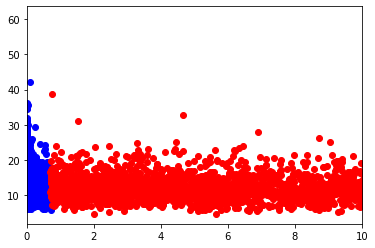

SpearmanrResult(correlation=-0.4230043209606764, pvalue=0.0)


In [131]:
# plt.plot(norm_loss, norm_dist, 'ro')
# plt.plot(loss, dist, 'ro')
plt.plot(correct_loss, correct_dist, 'bo', incorr_loss, incorr_dist, 'ro')
plt.xlim(0,10)
# plt.ylim(0,1000)
plt.show()

score = spearmanr(loss, norm_dist)
print(score)

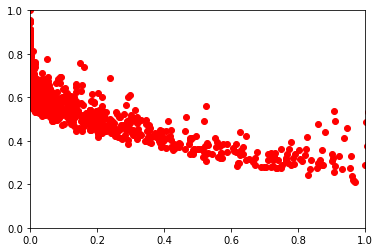

SpearmanrResult(correlation=-0.8659224292535013, pvalue=0.0)


In [19]:
Uni = [(conf[i]+dist[i])/2 for i in range(len(loss))]

plt.plot(loss[:2950], Uni[:2950], 'ro')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

score = spearmanr(loss[:2950], Uni[:2950])
print(score)

In [66]:
import torch
import torch.nn.functional as F
a = torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0])
print(F.softmax(a, dim=-1))
confidence = torch.max(F.softmax(a, dim=-1))
print(confidence)

tensor([0.0043, 0.0116, 0.0315, 0.0858, 0.2331, 0.6337])
tensor(0.6337)
